# 1. About the Data
* Data was gathered from kaggle.com. The data are from a survey, however, little to no context was given with these data. Furthermore the data lack an associated codebook. So it is unknown the population and means inwhich this sample was drawn. Regardless, this dataset was select primary for a few key variables of interest. Two target variables on amount of federal funds people think should be allocated to scientific research and a question an agree-disagree question "scientists are generally honest and are serving the public good."

In [10]:
#Data imported in its original form
import pandas as pd 
#df = pd.read_csv('/Users/RSE/python_notes/pulse-of-the-nation/201709-CAH_PulseOfTheNationORIGINALDATA.csv')
#df.head()
#df.describe()

,Income,Gender,Age,Age Range,Political Affiliation,Do you approve or disapprove of how Donald Trump is handling his job as president?,What is your highest level of education?,Q5OTH1,What is your race?,Q6OTH1,...,Do you agree or disagree with the following statement: vaccines are safe and protect children from disease.,"How many books, if any, have you read in the past year?",q14x,Do you believe in ghosts?,What percentage of the federal budget would you estimate is spent on scientific research?,q16x,"Is federal funding of scientific research too high, too low, or about right?",True or false: the earth is always farther away from the sun in the winter than in the summer.,"If you had to choose: would you rather be smart and sad, or dumb and happy?",Do you think it is acceptable or unacceptable to urinate in the shower?
0,8000.0,Female,64,55-64,Democrat,Strongly disapprove,College degree,NaN,White,NaN,...,Somewhat Disagree,20.0,NaN,Yes,NaN,Yes,Too Low,FALSE,Smart and Sad,Unacceptable
1,68000.0,Female,56,55-64,Democrat,Strongly disapprove,High school,NaN,Black,NaN,...,Somewhat Disagree,6.0,NaN,No,90.0,NaN,Too High,FALSE,Smart and Sad,Unacceptable
2,46000.0,Male,63,55-64,Independent,Somewhat Approve,Some college,NaN,White,NaN,...,Strongly Agree,0.0,NaN,No,20.0,NaN,About Right,TRUE,Dumb and happy,Acceptable
3,51000.0,Male,48,45-54,Republican,Strongly Approve,High school,NaN,White,NaN,...,Somewhat Disagree,1.0,NaN,No,10.0,NaN,About Right,FALSE,Dumb and happy,Unacceptable
4,100000.0,Female,32,25-34,Democrat,Somewhat Approve,Some college,NaN,White,NaN,...,Strongly Agree,30.0,NaN,Yes,NaN,Yes,Too Low,FALSE,Smart and Sad,Acceptable


## Data Cleaning: Deleting of Nonsensical Data & Recoding of Response Values
* The data were messy. First these data are from a survey wherein respondents selet agree-disagree boxes. Thus, Approve-disapprove, agree-disaggree, yes/no, True-false, and other response values had to be recode to numeric values. Following common practices in the social sciences, I assigned response scale to a ordinal numeric scale Strongly disagree - 1 to Strongly agree - 5. For a complete breakdown of the recodes see text file 'Pulse_Nation_recodes'. Generally, HIGHER agreement and GREATER approvel are assocatiated with higher values. Dichotomous response values were coded with 'yes' and True as '1', and 'no' and False as '0'. Lastly, missing cells were fill with NaN.
* I recode the Political Affliation column into three seperate dummy code ('1's' and '0's') columns: Democrat, Republican, and Independent, where 1's denote party affiliation. 
* Because I didn't know how to do all these recode in Python, I used Excel to recode. 
* Of the 28 Columns 18 were usable. Some columns were 'other demographic' categories (e.g., Other for gender or race), often, the decision was made to delete suchcolumns such as these. A few columns were deleted because they were nonsensical. All in all, I was left with 3 target columns 15 predicting/associative columns and 1000 rows.

In [335]:
import pandas as pd 
df = pd.read_csv('/Users/RSE/Python_notes/pulse-of-the-nation/Pulse_of_nation_recoded_SHORT.csv')
df.head()
df.describe()

,Income,Gender,Age,Democrat,Republican,Independent,Approval of Trump,Edu_coded,Belief in Climate Change (higher greater belief in),VaccinesSafeChildren,ScientistsHonested,TransformMoviesSeen,BookRead_Year,BeliefGhosts,TRUE-1 or FALSE-0: the earth is always farther away from the sun in the winter than in the summer.,Do you think it is Acceptable-1 orUnacceptable-0 to urinate in the shower?,"Is federal funding of scientific research TooHigh-1, TooLow-3, or AboutRight-2?",What percentage of the federal budget would you estimate is spent on scientific research?
count,456.000000,970.000000,1000.000000,850.000000,850.000000,850.000000,892.00000,971.000000,935.000000,953.000000,940.000000,938.000000,977.000000,975.000000,915.000000,898.000000,859.000000,712.000000
mean,89589.912281,0.502062,49.408000,0.322353,0.244706,0.432941,2.67713,2.540680,2.486631,4.270724,3.736170,1.333689,22.331116,0.383590,0.555191,0.436526,2.327125,18.146419
std,72274.998544,0.500254,16.628772,0.467652,0.430166,0.495774,1.71774,1.023005,0.751574,1.208406,1.373168,1.559409,75.869138,0.486509,0.497216,0.496231,0.739399,20.974433
min,5000.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,41750.000000,0.000000,37.000000,0.000000,0.000000,0.000000,1.00000,2.000000,2.000000,4.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,5.000000
50%,74500.000000,1.000000,50.000000,0.000000,0.000000,0.000000,2.00000,3.000000,3.000000,5.000000,4.000000,1.000000,5.000000,0.000000,1.000000,0.000000,2.000000,10.000000
75%,120250.000000,1.000000,61.000000,1.000000,0.000000,1.000000,5.00000,3.000000,3.000000,5.000000,5.000000,2.000000,18.000000,1.000000,1.000000,1.000000,3.000000,25.000000
max,500000.000000,1.000000,99.000000,1.000000,1.000000,1.000000,5.00000,4.000000,3.000000,5.000000,5.000000,5.000000,1000.000000,1.000000,1.000000,1.000000,3.000000,100.000000


## 2. Exploratory Data Analysis
* From the descriptive statistics above it appears that the data recode was successful. All the values make sense. Now I will plot some distributions and use a heatmap to look at correlations.

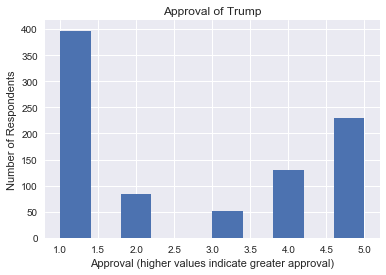

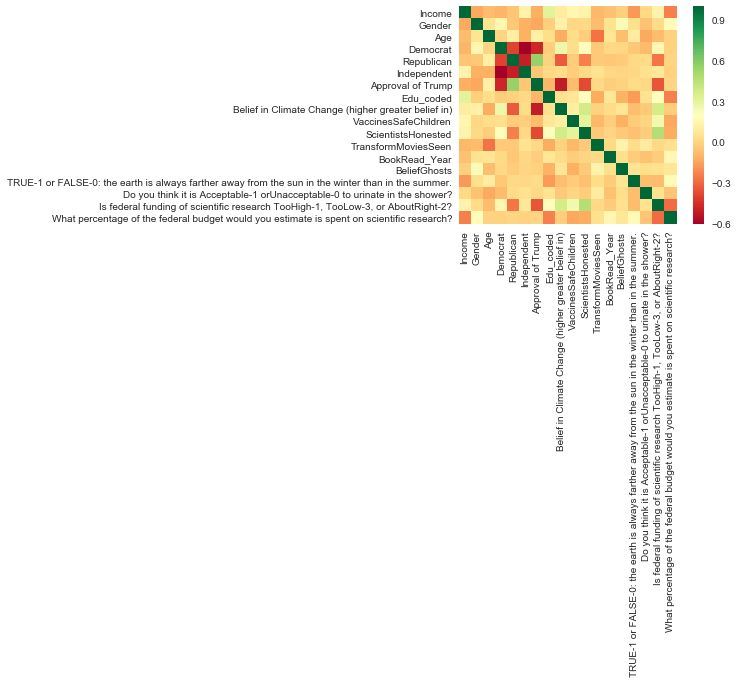

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df.hist(column='Approval of Trump')
plt.xlabel('Approval (higher values indicate greater approval)')
plt.ylabel('Number of Respondents')
plt.show()

#df.hist(column= 'How many books, if any, have you read in the past year?', bins=3)
#plt.show()

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

## Thoughts on EDA plots
* Some distributions are skew such as income, however, for the purpose of this assignment it isn't a concern.  
* Also it appears that income and level of education may be associated with peoples opinions towards the percentage of federal fund that should be dedicated to scientific research. This association will be tested. 

## 3. Hypothesis Testing: Selections of Variables for a Decision Tree
* The target variable of interest is the percentage of federal funds (categorical assign as either 3-Too Low, 2-Just Right, or 1-Too High) people think should be allocated to scientific research. This variable is categorical, so a decision tree will be utilized. 
* Using a decision tree was a personal choose, because I'm less familiar with this method and had never employed the method myself. 
* It appears that income and level-of-education are associated with the target variable. Additionally, the topic of allocating federal funds to science is assumed to be politically dividing. Thus, the three political dummy codes (Democrat, Repubican, Independent) will be included in the model. Similarly, approval of president Trump will also be included in the model. 
* In the same spirit, two questions one that gauges the belief in Climate Change (higher values indicated belief in human influence Climate Change) and the belief that vaccines are safe for children (higher values indicate belief that vaccines are safe) are both grounded in research. Thus, these two questions may help explain variance in the target variable. Based on the HeatMap Belief in Climate Change and 'safety of vaccines' aren't correlated. 
* Additionally, an agree-disagree measure of the perceived honesty of scientists will be included. Higher values indicate the belief that scientist are honest. 
* Income, Gender, and Age will be included as control variables
* All of the aforemention variables are thought to be independently related to the target variables, in a relative sense.

## 4. Machine Learning Model Implementation

## Note: Decision to impute missing cases
* I tried to run the decision tree below and there were too many NaNs, so I made various decisions regarding missing data.
* First, subsets of data with missing categorical values were dropped. This reduced the data to 825 rows. 
* Second, other variables Approval of Trump, education level, Climate Change, Vaccines, Scientist Honesty were imputed with the mean. 
* Third, missing data for income was huge, so the variable was dropped from the model
* Lastly, the missing cases for the target variable FedFund was impute with the mode 3.0 indicated that funds allocated to scientific research is 'Too Low'

* For convenence target variable 'What percentage of the federal budget would you estimate is spent on scientific research?' was relabeled 'percentage'
* Two other variables were renamed see below

In [336]:
df.rename(columns = {'What percentage of the federal budget would you estimate is spent on scientific research?':'Percentage'}, inplace=True)
df.columns

df.rename(columns = {'Is federal funding of scientific research TooHigh-1, TooLow-3, or AboutRight-2?': 'FedFund'}, inplace=True)
df.columns

df.rename(columns = {'Do you think it is Acceptable-1 orUnacceptable-0 to urinate in the shower?': 'urinate'}, inplace=True)
df.columns

Index(['Income', 'Gender', 'Age', 'Democrat', 'Republican', 'Independent',
       'Approval of Trump', 'Edu_coded',
       'Belief in Climate Change (higher greater belief in)',
       'VaccinesSafeChildren', 'ScientistsHonested',
       'What is your highest level of education? ', 'Political Affiliation',
       'Ethnicity', 'Martial_Status',
       'Do you believe that climate change is real and caused by people, real but not caused by people, or not real at all?',
       'TransformMoviesSeen', 'BookRead_Year', 'BeliefGhosts',
       'TRUE-1 or FALSE-0: the earth is always farther away from the sun in the winter than in the summer.',
       'urinate', 'FedFund', 'Percentage'],
      dtype='object')

In [353]:
#print(df.isnull().sum()) 

#drop rows if any values in political subsets are missing
df.dropna(subset=['Gender','Democrat', 'Republican', 'Independent'], how='any').shape 

df['Approval of Trump'].fillna(float(3.0), inplace=True) #the 108 missing values were imputed with the mean
df['Approval of Trump'].value_counts() #check imputation

#Edu_coded                                              
df['Edu_coded'].fillna(float(3.0), inplace=True) #the 29 missing values were imputed with the mean
df['Edu_coded'].value_counts()#check imputation

#Belief in Climate Change (higher greater belief in)    
df['Belief in Climate Change (higher greater belief in)'].fillna(value=float(2.0), inplace=True) #the 65 missing values were imputed with the mean
df['Belief in Climate Change (higher greater belief in)'].value_counts()#check imputation

#VaccinesSafeChildren                                   
df['VaccinesSafeChildren'].fillna(float(4.0), inplace=True) #the 47 missing values were imputed with the mean
df['VaccinesSafeChildren'].value_counts()#check imputation

#ScientistsHonested                                     
df['ScientistsHonested'].fillna(float(4.0), inplace=True) #the 60 missing values were imputed with the mean
df['ScientistsHonested'].value_counts()#check imputation

#Although not in my model impute and cross-checking these variables help me figure out how I might imputate variables##
############################################################################################################
#What percentage of the federal budget would you estimate is spent on scientific research?
#df['Percentage'].fillna(value=float(18.0), inplace=True) #the 288 missing values were imputed with the mean
#df['Percentage'].value_counts()#check imputation

#Do you think it is Acceptable-1 orUnacceptable-0 to urinate in the shower?
#df['urinate'].fillna(value=int(0.0), inplace=True) #the 102 missing values were imputed with the mode False '0'
#df['urinate'].value_counts()#check imputation
###############################################################################################################

#Do you think it is Acceptable-1 orUnacceptable-0 to urinate in the shower?
df['FedFund'].fillna(value=int(3.0), inplace=True) #the 141 missing values were imputed with the mode False '0'
df['FedFund'].value_counts()#check imputation

3.0    562
2.0    298
1.0    140
Name: FedFund, dtype: int64

In [354]:
#drop rows if any values in political subsets are missing
#selecting of predicting variables
#data = df.dropna(subset=['Gender','Democrat', 'Republican', 'Independent','Percentage'], how='any').shape

X = df.dropna(subset=['Gender','Democrat', 'Republican', 'Independent'], how='any').iloc[:,1:11] 

#selection of target variable Percentage of Fed Funds
y = df.dropna(subset=['Gender','Democrat', 'Republican', 'Independent'], how='any').iloc[:,-2]

#check that exclusion was correctly done
print(X.shape)
print(y.shape)


(825, 10)
(825,)


In [357]:
#this code was used to determine value_counts, missing cases, and date type of variables

#print(X.isnull().sum())
#y.isnull().sum()
#print(y.dtype)
#y.astype(float)
#print(y.dtype)
#df['FedFund'].value_counts()

In [355]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree, preprocessing, utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

steps = [('scaler', StandardScaler()),
        ('clf', tree.DecisionTreeClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#assert len(X_train) + len(X_test) == len(X) # confirming the split was correctly done

# Defining a decison tree classifier
clf = pipeline.fit(X_train, y_train)


from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        1.0       0.31      0.31      0.31        42
        2.0       0.29      0.29      0.29        83
        3.0       0.62      0.62      0.62       148

avg / total       0.47      0.47      0.47       273



## Thoughts
* This performance is awful! No better than chance. Lets see if more data would improve the model.
* I hope you don't mind, I borrowed your code!

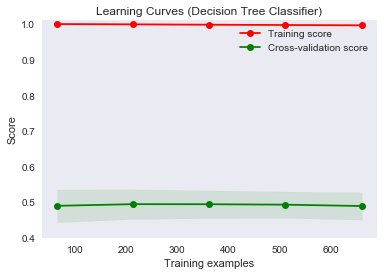

In [356]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# digits = load_digits()
# X, y = digits.data, digits.target


title = "Learning Curves (Decision Tree Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=500,
                                   test_size=0.2, random_state=0)

estimator = tree.DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

plt.show()

## Thoughts
* The training and cross-validation score don't come close to converging. Furthermore, the confidence interval around the cross-validation scores is tight! This suggest that more data would NOT change this trajectory.
* I think in other instances I would look at other performance metric, however, the underdeveloped data I think kills this project!

## 5. Concluding Thoughts
* These data are garbage, lacking depth and meaningful relationships. Off-hand I would scrap this project and start a new. 
* By far the biggest hurdle face with these data was missing cases. Missing case littered the data, so much I had to re-adjust twice over and select other 'more-complete' variables. The major take-away I learned was how much data scientist are at the mercy of their data! Large samples not only protect you from violations of assumptions and enhance variability, but more specifically large samples of COMPLETE DATA protect against these things. I was aware of this relationship before, however, the present project shows the ways missing and deficent data can hurt. 
* I might revisit these data, if a stakeholder was adament and wanted answers from the data. If I were to revisit the data I would allocated a lot of time to data imputation and assessment of viable relationships amongst variables in the data, relative to missing cases.
* I thought the target variable would be explain, in part, by political leanings and education. This was not the case, however, the imputation method (mode) I think biased the data. 
* Despite finding dismal results, I think it was largely due to the lack of quality data. I deliberately choose a categorical variable, which puts me at a disadvantage when it comes to variability. Furthermore, missing cases general weakened things, and lastly no meaningful relationship seems to shin through. A more thorough understanding of the data and possible relationship would benefit this project, but I cautionly say this knowing the extend of missing response across the dataset. 